In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
from PIL import Image


In [3]:
def rgb_to_hex(rgb):
    return '#%02x%02x%02x' % (int(rgb[0]), int(rgb[1]), int(rgb[2]))

In [4]:
img = Image.open("dogs.jpeg")
np_array = np.array(img)
np_array.shape

(185, 272, 3)

In [5]:
print("Height : " + str(img.height))
print("Width : " + str(img.width))

Height : 185
Width : 272


In [6]:
flat_array = np_array.ravel()
new_array = flat_array.reshape(np_array.shape[0] * np_array.shape[1], np_array.shape[2])

In [7]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(new_array)

/home/aman-chaurasia/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

In [8]:
kmeans.cluster_centers_

array([[251.52604694, 247.78555533, 243.32338661],
       [ 29.60878353,  21.66133173,  20.54312558],
       [210.91381423, 175.14908913, 144.03087983]])

In [9]:
print("Elements of Each cluster ")
unique, counts = np.unique(kmeans.labels_, return_counts=True)
print(dict(zip(unique, counts)))


Elements of Each cluster 
{0: 19784, 1: 18298, 2: 12238}


In [10]:
df = pd.DataFrame(new_array, columns=["col1", "col2", "col3"])
df["cluster"] = kmeans.labels_
print(df.head())

   col1  col2  col3  cluster
0   240   240   240        0
1   255   255   255        0
2   255   255   255        0
3   251   251   251        0
4   255   255   255        0


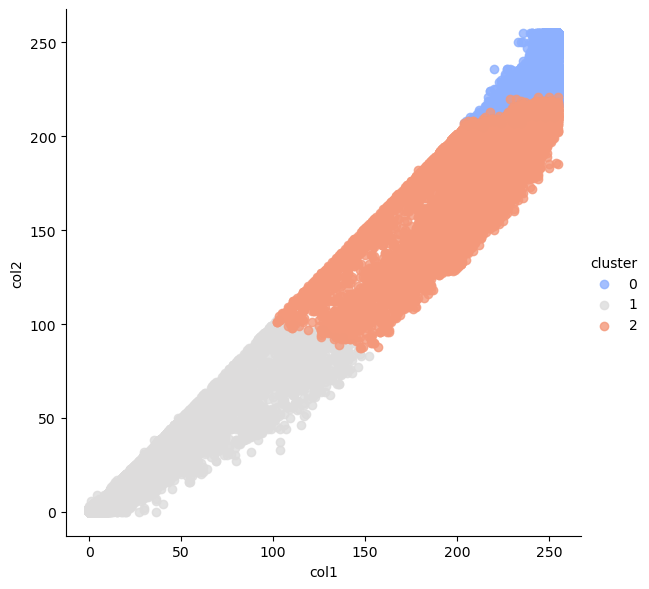

In [11]:
sns.lmplot(x='col1', y='col2', data=df, hue="cluster",
           palette='coolwarm', height=6, aspect=1, fit_reg=False)


In [12]:
X_compressed = kmeans.cluster_centers_[kmeans.labels_]
X_compressed = np.clip(X_compressed.astype('uint8'), 0, 255)
X_compressed = X_compressed.reshape(
    np_array.shape[0], np_array.shape[1], np_array.shape[2])

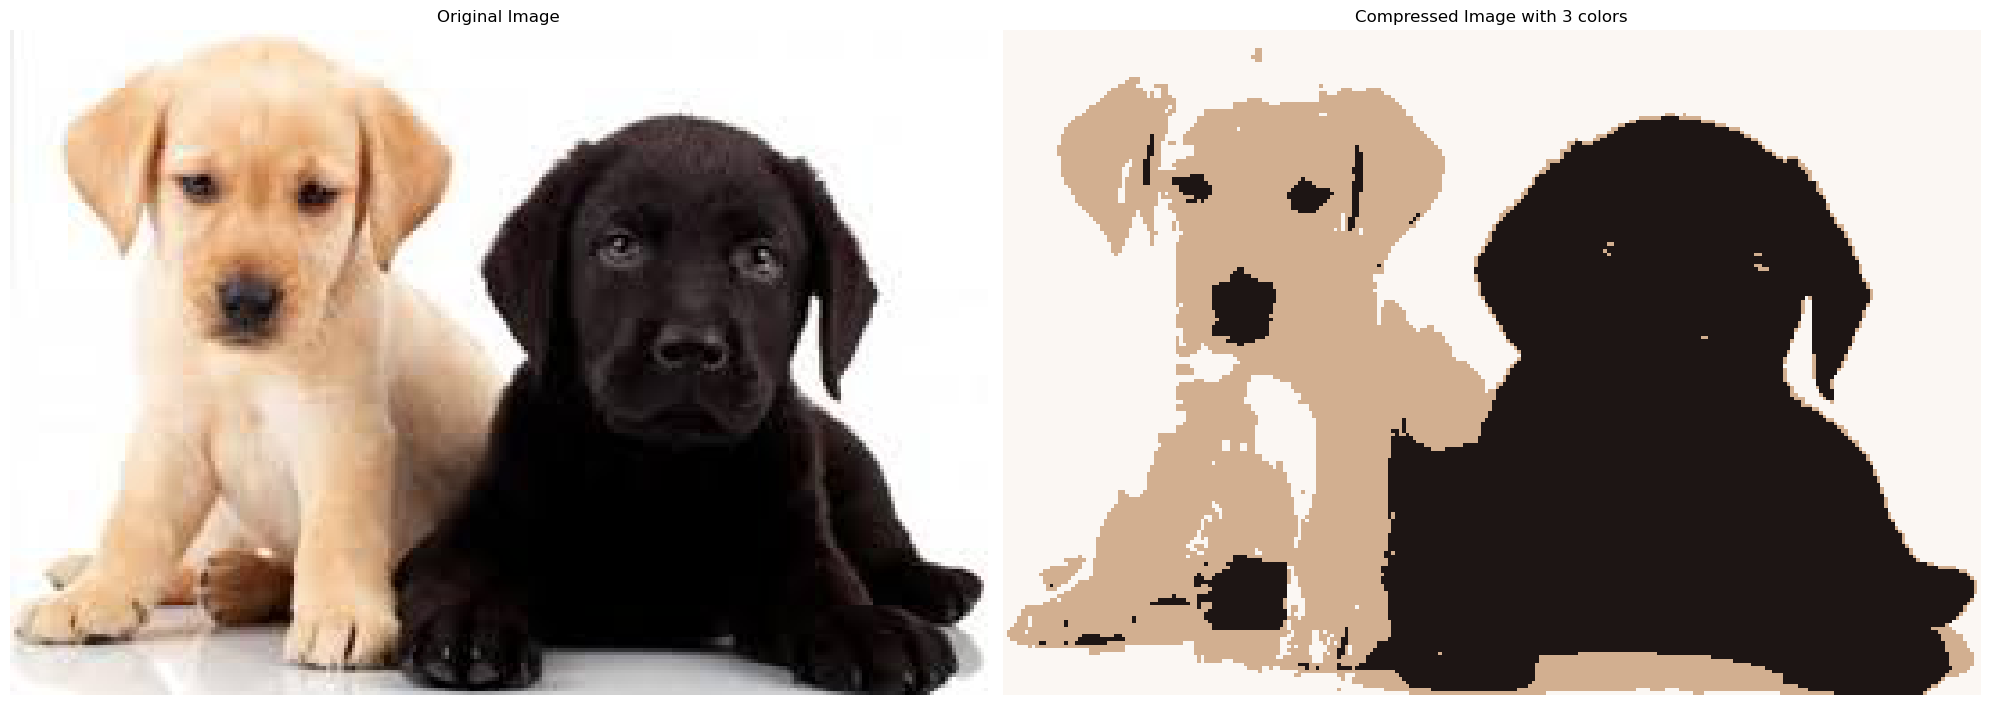

In [13]:
fig, ax = plt.subplots(1, 2, figsize=(20, 8))
ax[0].imshow(img)
ax[0].set_title('Original Image')
ax[1].imshow(X_compressed)
ax[1].set_title('Compressed Image with 3 colors')
for ax in fig.axes:
    ax.axis('off')
plt.tight_layout()


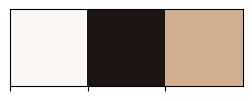

In [14]:
centroid_colors = kmeans.cluster_centers_.astype(int)
colours = [rgb_to_hex(color) for color in centroid_colors]

sns.palplot(colours)
plt.show()
